In [1]:
import numpy as np

straight_numpy = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/straight/rgb.npy")
right_numpy = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/right/rgb.npy")
left_numpy = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/left/rgb.npy")

labels_straight = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/straight/labels.npy")
labels_right = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/right/labels.npy")
labels_left = np.load("/mnt/7A0C2F9B0C2F5185/CARLA_data/left/labels.npy")

data = np.concatenate((straight_numpy,right_numpy,left_numpy)) 
labels = np.concatenate((labels_straight,labels_right,labels_left)) 

In [2]:
print(len(data))
print(len(labels))

128383
128383


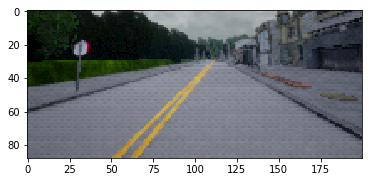

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 

img = Image.fromarray(data[500], 'RGB')
plt.imshow(img)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio
%matplotlib inline  

kwargs_write = {'fps':1.0, 'quantizer':'nq'}

images = []

for npy_img_idx in range(0, 100):
    images.append(data[npy_img_idx])

imageio.mimsave('./carla_visualization.gif', images, fps=5)

In [6]:
import pandas
import numpy

index = ['Frame'+str(i) for i in range(1, len(labels)+1)]

df = pandas.DataFrame(labels, index=index)

In [6]:
len(labels[0])

25

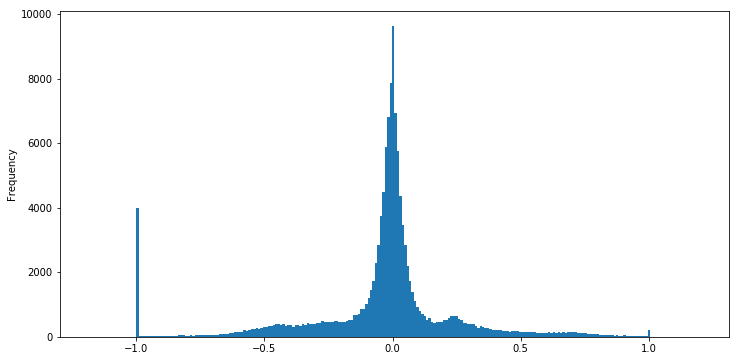

In [8]:
# steer

df[0].plot(kind = 'hist', bins = 250, figsize=(12, 6))

In [11]:
print(min(df[0]))
print(max(df[0]))

-1.180651068687439
1.1950043439865112


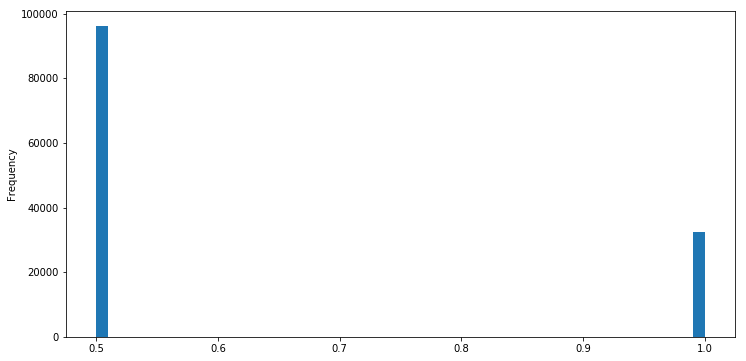

In [8]:
# gas

df[1].plot(kind = 'hist', bins = 50, figsize=(12, 6))

In [12]:
print(min(df[1]))
print(max(df[1]))

0.5
1.0


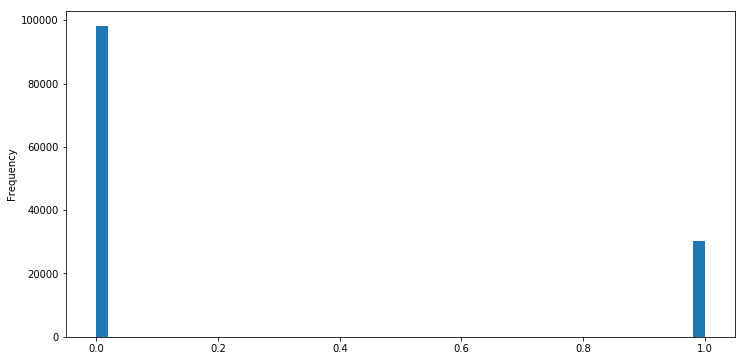

In [9]:
# brake

df[2].plot(kind = 'hist', bins = 50, figsize=(12, 6))

In [13]:
print(min(df[2]))
print(max(df[2]))

0.0
1.0


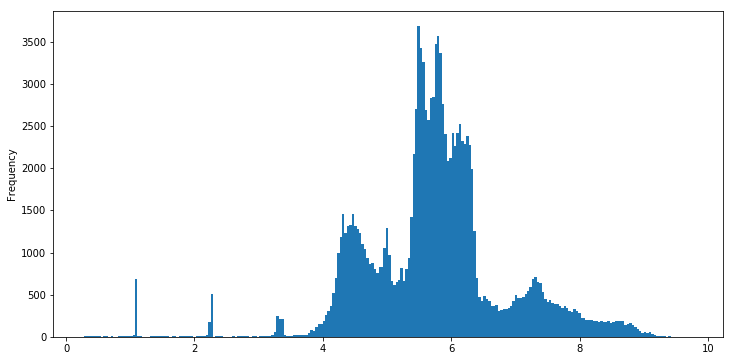

In [15]:
# speed

df[5].plot(kind = 'hist', bins = 250, figsize=(12, 6))

In [17]:
print(min(df[5]))
print(max(df[5]))

# what does the x-axis means?

0.27810680866241455
9.757162094116211


In [11]:
actions_labels = labels[:, :3]

In [12]:
len(actions_labels)

128383

In [13]:
actions_labels.shape

(128383, 3)

In [14]:
actions_labels[:10]

array([[ 2.28324890e-01,  5.00000000e-01,  0.00000000e+00],
       [-5.24902367e-04,  1.00000000e+00,  0.00000000e+00],
       [ 7.91843981e-03,  1.00000000e+00,  0.00000000e+00],
       [ 1.77178513e-02,  1.00000000e+00,  0.00000000e+00],
       [ 1.75571982e-02,  1.00000000e+00,  0.00000000e+00],
       [ 4.57153330e-03,  1.00000000e+00,  0.00000000e+00],
       [-6.17109006e-03,  5.00000000e-01,  0.00000000e+00],
       [-6.81413943e-03,  5.00000000e-01,  0.00000000e+00],
       [ 1.07297627e-02,  5.00000000e-01,  0.00000000e+00],
       [ 2.64564961e-01,  5.00000000e-01,  0.00000000e+00]])

In [15]:
data = data.astype(np.float32) / np.max(data).astype(np.float32)

In [16]:
data.shape

(128383, 88, 200, 3)

In [17]:
import tensorflow as tf

In [18]:
learning_rate = 0.0001
batch_size = 32
epochs = 50

X = tf.placeholder(tf.float32, [None, 88, 200, 3], 'X')
y = tf.placeholder(tf.float32, [None, 3], 'y')

conv1 = tf.layers.conv2d(X, 32, 5, strides=2, kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='SAME')
conv1_relu = tf.nn.relu(conv1)

conv2 = tf.layers.conv2d(conv1_relu, 32, 3, strides=2,
                         kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='VALID')
conv2_relu = tf.nn.relu(conv2)


conv3 = tf.layers.conv2d(conv2_relu, 64, 3, strides=2,
                         kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='VALID')
conv3_relu = tf.nn.relu(conv3)


conv4 = tf.layers.conv2d(conv3_relu, 64, 3, strides=2,
                         kernel_initializer=tf.contrib.layers.xavier_initializer(),padding='VALID')
conv4_relu = tf.nn.relu(conv4)

flattened_layer = tf.contrib.layers.flatten(conv4_relu)

fc1 = tf.layers.dense(inputs=flattened_layer, units=64,
                      kernel_initializer=tf.contrib.layers.xavier_initializer())
fc1_relu = tf.nn.relu(fc1)
fc1_drop = tf.layers.dropout(fc1_relu, rate=0.5)


fc2 = tf.layers.dense(inputs=fc1_drop, units=32, kernel_initializer=tf.contrib.layers.xavier_initializer())
fc2_relu = tf.nn.relu(fc2)
fc2_drop = tf.layers.dropout(fc2_relu, rate=0.5)

logits = tf.layers.dense(inputs=fc2_drop, units=3,
                                kernel_initializer=tf.contrib.layers.xavier_initializer())

loss_s = tf.losses.mean_squared_error(y[:, 0], logits[:, 0])
loss_g = tf.losses.mean_squared_error(y[:, 1], logits[:, 1])
loss_b = tf.losses.mean_squared_error(y[:, 2], logits[:, 2])
loss = loss_s + loss_g + loss_b

optimizer = tf.train.AdamOptimizer(learning_rate)

train_op = optimizer.minimize(loss)

In [ ]:
iters = len(data) // batch_size

In [ ]:
iters

4011

In [ ]:
actions_labels.shape

(128383, 3)

In [ ]:
from tqdm import tqdm

sess = tf.Session()

sess.run(tf.global_variables_initializer())


for epoch in range(0, epochs):

    losses = 0
    for itr in tqdm(range(iters)):
        x_batch = data[itr*batch_size:itr*batch_size+batch_size]
        y_batch = actions_labels[itr*batch_size:itr*batch_size+batch_size]
        _, loss_val = sess.run(
            [train_op, loss],
            {X: x_batch, y: y_batch})
        losses += loss_val

    print('epoch: {0}\tloss: {1}'.format(epoch, losses / itr))

  0%|          | 6/4011 [00:00<01:10, 56.44it/s]

epoch: 0	loss: 0.24548732799122533


  0%|          | 8/4011 [00:00<00:52, 76.49it/s]

epoch: 1	loss: 0.18882986513289282


  0%|          | 8/4011 [00:00<00:54, 72.97it/s]

epoch: 2	loss: 0.16871284936819494


  0%|          | 9/4011 [00:00<00:47, 84.82it/s]

epoch: 3	loss: 0.15906744904960146


  0%|          | 8/4011 [00:00<00:52, 75.68it/s]

epoch: 4	loss: 0.1513431371906145


  4%|▎         | 144/4011 [00:02<00:55, 70.24it/s]